## Resting State Eyes open vs eyes closed
 - Examine the results of parametrizing spectra for the regions from source reconstructed EEG

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from functools import reduce
from IPython.display import display

In [3]:
csv_path =  '../data/all_ROI_offset_exponent_dataframe_merged.csv'
df = pd.read_csv(csv_path)

display(df)
# %%
display(df["ROI"].unique())
display(df["age"].unique())

len(df["ROI"].unique())

,subjectID,condition,CF,ROI,offset,exponent,errors,r2s,PW,BW,gender,age,age_cond
0,sub-032412,EC,10.601997,bankssts L,-16.773654,1.590843,0.069819,0.977512,0.995602,2.500000,2,20-25,YOUNG
1,sub-032412,EC,20.394253,bankssts L,-16.773654,1.590843,0.069819,0.977512,0.479953,8.000000,2,20-25,YOUNG
2,sub-032412,EC,10.595415,bankssts R,-17.014893,1.382978,0.059309,0.980736,0.944707,2.500000,2,20-25,YOUNG
3,sub-032412,EC,20.448035,bankssts R,-17.014893,1.382978,0.059309,0.980736,0.469201,6.091836,2,20-25,YOUNG
4,sub-032412,EC,10.682303,caudalanteriorcingulate L,-17.100722,1.791091,0.040982,0.991562,0.502703,2.500000,2,20-25,YOUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67935,sub-032469,EO,19.982836,temporalpole R,-16.738230,1.744570,0.062472,0.986519,0.598704,8.000000,2,20-25,YOUNG
67936,sub-032469,EO,9.914749,transversetemporal L,-16.789777,1.628003,0.070723,0.982766,1.218202,3.475544,2,20-25,YOUNG
67937,sub-032469,EO,20.017787,transversetemporal L,-16.789777,1.628003,0.070723,0.982766,0.695210,8.000000,2,20-25,YOUNG
67938,sub-032469,EO,9.916355,transversetemporal R,-16.879896,1.581279,0.067155,0.983885,1.231576,3.453974,2,20-25,YOUNG


array(['bankssts L', 'bankssts R', 'caudalanteriorcingulate L',
       'caudalanteriorcingulate R', 'caudalmiddlefrontal L',
       'caudalmiddlefrontal R', 'cuneus L', 'cuneus R', 'entorhinal L',
       'entorhinal R', 'frontalpole L', 'frontalpole R', 'fusiform L',
       'fusiform R', 'inferiorparietal L', 'inferiorparietal R',
       'inferiortemporal L', 'inferiortemporal R', 'insula L', 'insula R',
       'isthmuscingulate L', 'isthmuscingulate R', 'lateraloccipital L',
       'lateraloccipital R', 'lateralorbitofrontal L',
       'lateralorbitofrontal R', 'lingual L', 'lingual R',
       'medialorbitofrontal L', 'medialorbitofrontal R',
       'middletemporal L', 'middletemporal R', 'paracentral L',
       'paracentral R', 'parahippocampal L', 'parahippocampal R',
       'parsopercularis L', 'parsopercularis R', 'parsorbitalis L',
       'parsorbitalis R', 'parstriangularis L', 'parstriangularis R',
       'pericalcarine L', 'pericalcarine R', 'postcentral L',
       'postcentra

array(['20-25', '60-65', '25-30', '70-75', '65-70', '55-60', '75-80',
       '30-35', '35-40'], dtype=object)

68

In [4]:
def check_outliers(df, column_name, thresh):
    """Calculate indices of outliers, as defined by a standard deviation threshold."""
    data =  df[column_name]
    return df[np.abs(data - np.mean(data)) > thresh * np.std(data)]

In [5]:
std_thresh = 3
err_outliers = check_outliers(df, "errors", std_thresh)
std_outliers = check_outliers(df, "r2s", std_thresh)
outliers_row = pd.concat([err_outliers,std_outliers], axis=0)
outliers_row = outliers_row.drop_duplicates()
outliers_row

,subjectID,condition,CF,ROI,offset,exponent,errors,r2s,PW,BW,gender,age,age_cond
1627,sub-032484,EO,25.525558,bankssts L,-15.129261,2.554552,0.394757,0.691237,1.465226,8.000000,1,70-75,OLD
1631,sub-032484,EO,27.912263,caudalanteriorcingulate L,-16.094137,2.364308,0.331677,0.701189,1.524362,8.000000,1,70-75,OLD
1632,sub-032484,EO,27.941522,caudalanteriorcingulate R,-15.978149,2.277204,0.330422,0.684510,1.497069,8.000000,1,70-75,OLD
1633,sub-032484,EO,27.503537,caudalmiddlefrontal L,-15.676230,2.142129,0.335151,0.671646,1.570975,8.000000,1,70-75,OLD
1634,sub-032484,EO,27.912150,caudalmiddlefrontal R,-15.910736,1.839048,0.336983,0.598806,1.458047,8.000000,1,70-75,OLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66994,sub-032451,EO,9.659155,entorhinal R,-17.759917,0.973640,0.115538,0.871194,0.576918,2.956145,2,75-80,OLD
67037,sub-032451,EO,12.953807,lingual L,-16.748174,1.061058,0.136569,0.867283,0.494306,8.000000,2,75-80,OLD
67196,sub-032451,EC,10.057450,middletemporal L,-16.512827,1.215250,0.167586,0.872640,0.826774,4.707190,2,75-80,OLD
67217,sub-032451,EC,9.128745,parsorbitalis R,-17.771166,1.044988,0.132076,0.861117,0.811712,2.500000,2,75-80,OLD


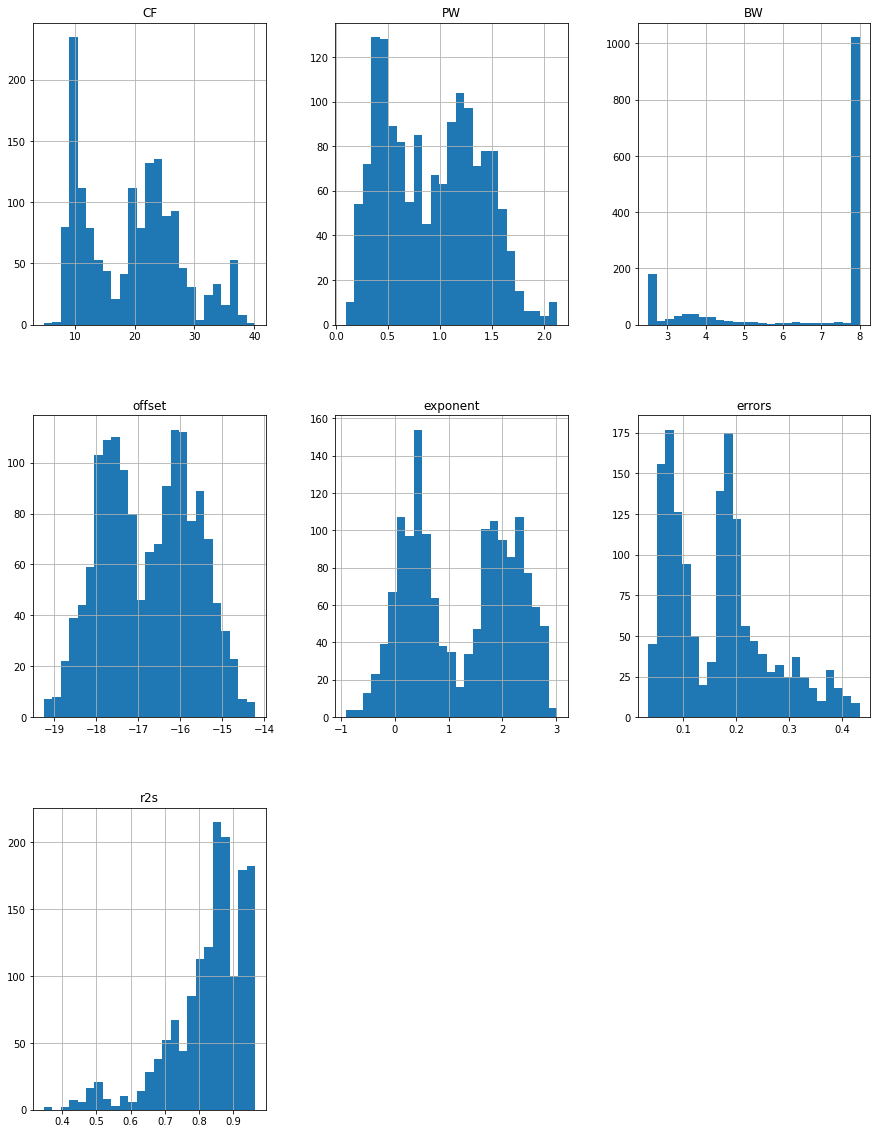

In [6]:
outliers_row.hist(figsize = (15,20),column = ['CF', 'PW', 'BW', 'offset', 'exponent', 'errors', 'r2s', 'ROI', 'subjectID', 'condition'],  bins=25);

Here I will drop the outliers from my data (the outliers are 2,5 k)

In [7]:
df.drop(labels=outliers_row.index, axis=0)
csv_path =  '../data/fooofed_data_all_regions.csv'

df.to_csv(csv_path, index = False, header=True)